<a href="https://colab.research.google.com/github/qilin512/OUC-ComputerVision/blob/main/project/05-Texton/Textons.ipynb" target="_parent"><img src="colab-badge.svg" alt="Open In Colab"/></a>

# Textons



纹理是由重复的规则或随机pattern构成的一类图像。纹理描述了物体的材质。纹理基元（texton）是描述纹理的一种经典方法，以此发展出了用于纹理图像识别的bag of textons模型，这种思想和方法后来又转移到图像识别领域形成影响深远的bag-of-visual-words模型。

推荐一篇关于纹理表征texture representation的综述论文[pdf](https://link.springer.com/article/10.1007/s11263-018-1125-z):

Liu, Li, Jie Chen, Paul Fieguth, Guoying Zhao, Rama Chellappa, and Matti Pietikäinen. 2019. “From BoW to CNN: Two Decades of Texture Representation for Texture Classification.” International Journal of Computer Vision, January, 74–109. doi:10.1007/s11263-018-1125-z.

本次作业实现纹理图像的LM texton算法，是[原文](https://people.eecs.berkeley.edu/~malik/papers/LM-3dtexton.pdf)算法的简化版。CMU大学有类似的[作业](http://www.cs.cmu.edu/~nileshk/projects/TextureClassification.pdf)，可以参考。



## 数据集

最古老的[Brodatz数据集](https://sipi.usc.edu/database/database.php?volume=textures)，一共有111类，但是每类只有1张图片。下面的示例代码仅演示使用该数据集里的一部分图像。该数据集中的图像是单通道，1024像素，由于每类仅有1幅图像，数据量太少，所以这里的示例代码使用随机截取256的子图像作为数据增强的方法。

使用深度学习框架里的Dataset类来描述数据集，方便在后面不同的算法里使用该数据集里的数据。

**PyTorch代码：**

(tensor([[[0.4392, 0.3529, 0.3804,  ..., 0.8000, 0.8314, 0.8353],
         [0.4706, 0.4510, 0.3961,  ..., 0.7333, 0.7216, 0.7412],
         [0.5490, 0.5294, 0.4392,  ..., 0.6667, 0.7020, 0.6588],
         ...,
         [0.6157, 0.6314, 0.6784,  ..., 0.7020, 0.7059, 0.6667],
         [0.6039, 0.6667, 0.6941,  ..., 0.8118, 0.7882, 0.7765],
         [0.6314, 0.7059, 0.7882,  ..., 0.7882, 0.7765, 0.6902]]]), 12)
torch.Size([1, 256, 256])


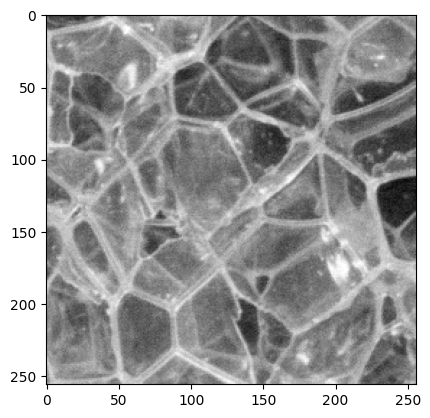

In [12]:
# Brodatz数据集的Dataset类
# 使用1.3.01.tiff至1.3.13.tiff这13个纹理图像作为13个不同的类别，每幅图像随机裁剪出100张256*256大小的子图像
# 在训练深度神经网络模型时，每类需要更多的图像，Brodatz数据集将不适用

import torch
from torch.utils.data import Dataset
import torchvision
from torchvision.io import read_image
import cv2 # 上面PyTorch的read_image函数无法读取tiff图像
import numpy as np
import os
import random
random.seed(6)

class BrodatzDataset(Dataset):
    def __init__(self, img_dir, num_per_class=100, transform=None):
        self.img_dir = img_dir
        self.num_per_class = num_per_class
        self.transform = transform
        self.img_files = [img_dir + '1.3.' + str(i).zfill(2) + '.tiff' for i in range(1, 14)]
        self.labels = []
        for img_file in self.img_files:
            label = os.path.basename(img_file).split('.')[0][-2:]
            self.labels.append(int(label)-1)

    def __len__(self):
        return self.num_per_class * 13

    def __getitem__(self, index):
        label = index // self.num_per_class
        # image = read_image(self.img_files[index]).float()
        image1024 = cv2.imread(self.img_files[label], -1)#.astype(np.float32)
        h, w = image1024.shape
        # image1024 = np.expand_dims(image1024, axis=0)
        # x, y = 101, 101
        x = random.randint(0, w - 256)
        y = random.randint(0, h - 256)
        image = image1024[y:y+256, x:x+256]
        if self.transform:
            image = self.transform(image)
        return image, label

brodatz_dataset = BrodatzDataset(img_dir='./textures_1024/',
                  transform=torchvision.transforms.ToTensor())

# index range [0, 1299]
a_sample = brodatz_dataset[1200] # [index, image/label, C, H, W]
print(a_sample)
print(a_sample[0].shape) # the image, [C, H, W]

import matplotlib.pyplot as plt
plt.imshow(a_sample[0][0], cmap='gray')
plt.show()

**CURet数据集**

Based on the above code examples, please write your code using the CURet texture dataset. For simplicity, we will use the subset from VGG group, please download the [grey ones](http://www.robots.ox.ac.uk/~vgg/research/texclass/data/curetgrey.zip) or the [color ones](http://www.robots.ox.ac.uk/~vgg/research/texclass/data/curetcol.zip). 在本次作业中使用VGG组整理的CURet数据集的子集，下载灰度图像（推荐）或着彩色图像。There are 34 classes in this subset, and all images are cropped to 200x200 pixels.

500
(tensor([[[0.7451, 0.5451, 0.2980,  ..., 0.0000, 0.1451, 0.1922],
         [0.7961, 0.5765, 0.3098,  ..., 0.0078, 0.1922, 0.2392],
         [0.7608, 0.4980, 0.2000,  ..., 0.1176, 0.2863, 0.2980],
         ...,
         [0.3529, 0.1608, 0.1882,  ..., 0.0157, 0.0235, 0.0941],
         [0.3686, 0.2667, 0.1137,  ..., 0.0314, 0.0353, 0.3843],
         [0.2392, 0.2235, 0.1294,  ..., 0.0314, 0.0235, 0.3922]]]), 9)
torch.Size([1, 50, 50])


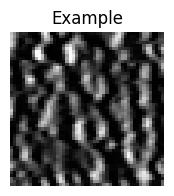

In [13]:
# TODO Write your Dataset class to load the CURet dataset （VGG selected)
# curetgrey中有61组sample，每组sample中有92张相似纹理的image
class CURetDataset(Dataset):
    def __init__(self, img_dir, img_idx=2, num_class=10, num_per_class=50, transform=None):
        self.img_dir = img_dir
        self.num_class = num_class
        self.num_per_class = num_per_class
        self.img_files = [img_dir + 'sample' + str(i).zfill(2) + '/' + str(i).zfill(2) + '-' + 
                          str(img_idx).zfill(3) + '.png' for i in range(1, num_class+1)]
        # print(self.img_files)
        self.transform = transform
        self.labels = [i for i in range(num_class)]
    
    def __len__(self):
        return self.num_per_class * self.num_class
    
    def __getitem__(self, index):
        label = index // self.num_per_class
        assert label < num_class, "Index out of range!"
        image200 = cv2.imread(self.img_files[label], -1)
        h, w = image200.shape
        x = random.randint(0, w - 50)
        y = random.randint(0, h - 50)
        image = image200[y:y+50, x:x+50] 
        if self.transform:
            image = self.transform(image)
        return image, label

# random.seed(6)
img_idx = 2
num_class = 10
num_per_class = 50
training_dataset = CURetDataset(img_dir='./curetgrey/', transform=torchvision.transforms.ToTensor())
print(len(training_dataset))
# index range [10, 499]
b_sample = training_dataset[499]
print(b_sample)
print(b_sample[0].shape)

plt.figure(figsize=(4,2))
plt.title('Example')
plt.imshow(b_sample[0][0], cmap='gray')
plt.axis('off')
plt.show()

## Texton

### LM filter bank

著名的牛津大学的VVG组提供了多种filter bank的[Matlab代码](https://www.robots.ox.ac.uk/~vgg/research/texclass/filters.html)。网上有人做了[Python的实现](https://github.com/tonyjo/LM_filter_bank_python)，但是其代码有bug，输出结果和Matlab的不一致，我把这个仓库fork了一份，并修正了其中的bug，给原作者提了PR。本次作业请使用我修改后的[Python代码](https://github.com/qilin512/LM_filter_bank_python/blob/master/lm.py)（我只修改了lm.py文件）。

输出的F矩阵（3维数组）包含了48个滤波器，每个都是49*49。


<center>
<img src="LM-filters.jpg" width="50%" height="50%">
<br>
LM-Filters from Liu2019IJCV.
</center>

In [14]:
# TODO 构造filter bank
# 可以把相关的代码拷贝过来，或者把该Python文件加入到工程中，作为jupyter笔记本调用的外部程序。
# %run lm.py
import lm
F = lm.makeLMfilters()
print(F.shape)

(49, 49, 48)


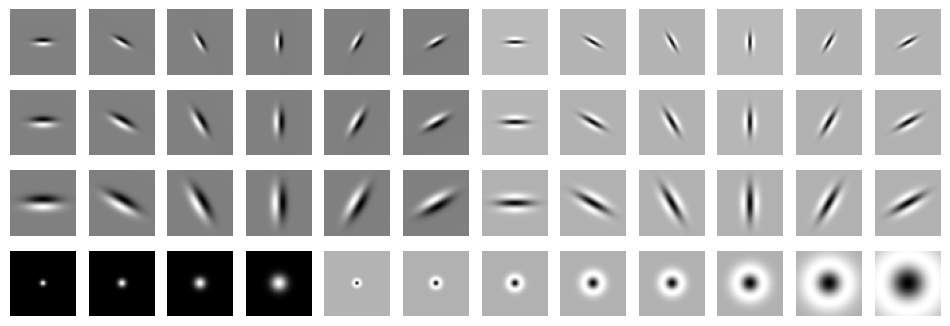

In [15]:
# TODO display the LM filter bank as the figure shows above 像上面的截图那样展示你生成的滤波器族
f, axs = plt.subplots(4, 12, figsize=(12, 4))
for i in range(18):
    axs[i//6, i%6].axis('off')
    axs[i//6, i%6].imshow(F[:,:,i], cmap='gray')
for i in range(18, 36):
    axs[(i-18)//6, (i-18)%6+6].axis('off')
    axs[(i-18)//6, (i-18)%6+6].imshow(F[:,:,i], cmap='gray')
k = 0
for i in range(3):
    for j in range(36+i, 48, 3):
        axs[3, k].axis('off')
        axs[3, k].imshow(F[:,:,j], cmap='gray')
        k += 1
plt.show()

### 基于滤波器响应(texton)的纹理图像分类

使用filter bank对图像进行滤波，滤波后的response在深度学习领域称为feature map特征图，假设滤波器个数为C，每个图像将产生C个feature map。特征图的元素个数还是很多，为了得到更低维的表示，计算每个特征图的零阶矩，比如均值和方差，并串联起来组成特征图的特征向量。因此可以得到元素个数为2C的特征向量，用这个特征向量作为这幅纹理的表征representation。

然后就可以使用机器学习算法对图像进行分类任务。这里先使用K-最近邻算法（K-Nearest Neighbourhood，KNN）。关于KNN算法，可以参考这个[知乎文章](https://zhuanlan.zhihu.com/p/25994179)或者这个[英文教程](https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm)进行学习。

Python的scikit库的文档里有使用Garbor filters进行纹理分类的[例子](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html)，有一点相似的地方，可以参考。

为了衡量分类算法的性能，需要把划分训练集和测试集（有时还需要验证集，比如为了选定KNN里距离函数）。请你先返回上面“数据集”一节的代码，修改为两个类，一个是train另一个是test，里面数据个数比例为8:2。在train数据集上训练KNN模型，在test数据集上测试，看看分类的正确率有多少，即test数据集里分类正确的数据个数占test数据集总个数的百分比。

In [16]:
# TODO 使用feature map的简单统计特征（均值和方差）对图像进行分类
from scipy import signal as ss


def get_feature_map(images, filter, num_per_class=1, num_class=1, all_per_class=50):
    num_filter = filter.shape[2]
    feature_map = np.zeros((num_class * num_per_class, filter.shape[2], *images[0][0][0].shape))
    cnt = 0
    for _class in range(num_class):
        for num in range(num_per_class):
            image = images[_class * all_per_class + num][0][0]
            for j in range(num_filter):
                feature_map[cnt,j] = ss.convolve2d(image, filter[:,:,j], mode='same')
            cnt += 1
    return feature_map

def get_features(feature_map):
    features = np.zeros((feature_map.shape[0], 2*feature_map.shape[1]))
    for i, feature in enumerate(feature_map):
        for j in range(feature_map.shape[1]):
            features[i][2*j:2*j+2] = [feature[j].mean(), feature[j].var()] 
    return features

num_per_class = 10
num_class = 10
all_per_class = 50
feature_map = get_feature_map(training_dataset, F, num_per_class, num_class, all_per_class)
print("特征图：", feature_map.shape)          
data = get_features(feature_map)
print("特征向量：", data.shape)

特征图： (100, 48, 50, 50)
特征向量： (100, 96)


训练集：(80, 96) 测试集：(20, 96)
预测标签：[4 1 1 1 2 2 3 3 4 4 5 5 6 6 5 1 6 6 9 9]
真实标签：[0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9]
测试集上正确率:70.0000%


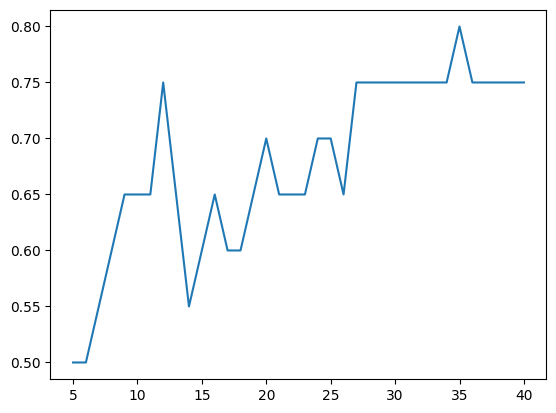

In [17]:
from sklearn.cluster import KMeans

# 测试集训练集划分
def dataset_split(data, train_per_class):
    train_data = []
    test_data = []
    for i, row in enumerate(data):
        if i % 10 < train_per_class:
            train_data.append(row)
        else:
            test_data.append(row)
    train_data = np.array(train_data)
    test_data = np.array(test_data)
    return train_data, test_data

def KNN(train_data, train_labels, test_data, k=5):
    labels = np.zeros((test_data.shape[0]),dtype=np.int32)
    for i in range(labels.shape[0]):
        dist = []
        for j in range(train_data.shape[0]):
            dis = np.linalg.norm(train_data[j]-test_data[i])
            label = train_labels[j]
            dist.append([dis, label])
            
        dist.sort(key=lambda x:x[0])
        dic = {}
        for _ in range(k):
            dic[dist[_][1]] = dic.get(dist[_][1], 0) + 1
        maxcnt, ans = 0, 0
        for lb, cnt in dic.items():
            if cnt > maxcnt:
                ans = lb
                maxcnt = cnt
        labels[i] = ans
    return labels

def score(gt, pre):
    return sum(gt==pre) / len(gt)

def knn_plot(maxk,mink = 4):
    x = [i + 1 for i in range(mink, maxk)]
    y = [0 for i in range(mink, maxk)]
    for i in range(mink, maxk):    
        predict_label = KNN(train_data, train_label, test_data, k=i+1)
        knn_score = score(test_label, predict_label)
        y[i-mink] = knn_score
    plt.plot(x,y)

# 定义训练集长度每个类
train_per_class = int(0.8 * num_per_class)
test_per_class = num_per_class - train_per_class
train_data, test_data = dataset_split(data, train_per_class)

train_label = np.repeat(np.arange(num_class), train_per_class)
test_label = np.repeat(np.arange(num_class), test_per_class)
predict_label = KNN(train_data, train_label, test_data, k=20)
knn_score = score(test_label, predict_label)

print(f"训练集：{train_data.shape} 测试集：{test_data.shape}" )
print(f"预测标签：{predict_label}")
print(f"真实标签：{test_label}")
print(f"测试集上正确率:{100*knn_score:.4f}%")
knn_plot(maxk=40)

[4 1 1 1 2 2 3 3 4 4 5 5 6 6 5 1 6 6 9 9]
[0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9]
70.0


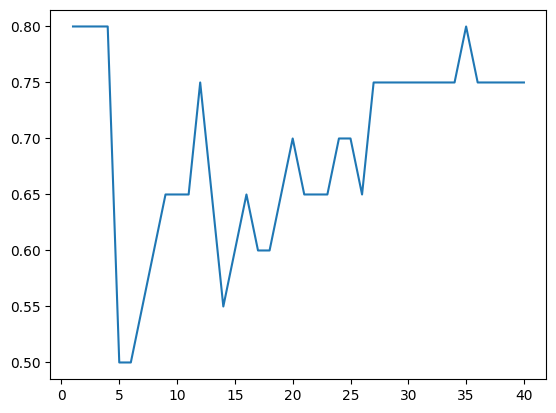

### 生成textons

通过上面的实验可以发现，分类效果并不好，很大一部分原因是因为仅使用feature map的均值和方差并不能很好的表征纹理图像，一幅图像或者其feature map包含很多信息，而仅使用feature map的两个一阶统计量是不够的。

这里我们要借鉴这篇[论文](https://people.eecs.berkeley.edu/~malik/papers/LM-3dtexton.pdf)中的方法了。使用LM filter bank对纹理图像进行滤波，在feature map的基础上生成Texton，然后使用texton组成的codebook完成分类任务。具体地，针对一幅纹理图像（大小为$H\times W$），使用filter bank进行滤波（假设滤波器个数为C），得到$H \times W \times C$的特征图。每个像素对应一个C维的特征向量。针对这$H \times W$个特征向量进行K-means聚类，设置聚类类别数比如K=20。这K个聚类中心即称为该纹理图像的appearance vector。这种算法是稀疏编码在纹理图像上的应用，对应着bag-of-words模型里的字典。

K-means算法可以通过[这篇知乎文章](https://zhuanlan.zhihu.com/p/20432322)或者[这篇英文教程](https://realpython.com/k-means-clustering-python/)进行学习。

下面请用代码实现生成texton的算法。

In [18]:
# TODO 使用K-means实现一幅纹理图像的滤波响应向量聚类
# 转换图像通道
def trans_feature_map(feature_map):
    C, H, W = feature_map.shape
    t_feature_map = np.zeros((H * W, C))
    cnt = 0
    for i in range(H):
        for j in range(W):
            t_feature_map[cnt] = feature_map[:,i,j]
            cnt += 1
    return t_feature_map

# KMeans聚类获取texton
def get_textons(train_data, train_per_class, num_class, n_clusters):
    km = KMeans(n_clusters, n_init='auto')
    appearance_vectors = np.zeros((num_class, n_clusters, train_data.shape[1]))
    for i in range(num_class):
        feature_map = train_data[i*train_per_class]
        t_feature_map = trans_feature_map(feature_map)
        km.fit(t_feature_map)
        appearance_vectors[i] = km.cluster_centers_
    return appearance_vectors

train_feature, test_feature = dataset_split(feature_map, train_per_class)
print(f"训练集：{train_feature.shape} 测试集：{test_feature.shape}" )

n_clusters = 20
vector = get_textons(train_feature, train_per_class, num_class, n_clusters)
print("textons:", vector.shape)

训练集：(80, 48, 50, 50) 测试集：(20, 48, 50, 50)
textons: (10, 20, 48)


### 基于texton的纹理分类

如果做纹理分类任务，将数据集中的所有纹理图像都进行上述处理，每个图像都产生K个聚类中心（texton），该向量称为appearance vector。所有图像的texton放在一起，再按距离把相似的进行合并（这一步可选），最终得到Q个texton。这样，每个图像的每个像素属于哪个texton是可追溯的，能得到一幅或者一类图像在这Q个texton上的频率分布（直方图）。在推断的时候，给定一幅纹理图像，还是用这个filter bank滤波后，每个像素对应的特征向量和Q个texton计算距离，选择距离最近的作为其对应的texton，从而获得该图像在Q个texton上的分布直方图。将该直方图和训练集中的每类对应的直方图计算卡方距离（$\chi^2$ distance），即能进行分类。

下面，请实现该算法：

In [19]:
# TODO 基于texton的纹理分类
def get_histogram(feature, _class, textons):
    C, H, W = feature.shape
    histogram = np.zeros(textons.shape[1])
    for i in range(H):
        for j in range(W):
            pixel = feature[ : , i, j]
            closest_k = -1
            distance = float('inf')
            for k in range(textons.shape[1]):
                center = textons[_class, k]
                dist = np.linalg.norm(pixel - center)
                if dist < distance:
                    closest_k = k
                    distance = dist
            histogram[closest_k] += 1
    histogram /= sum(histogram)
    return histogram

def get_histogram_database(train_feature, textons, train_per_class):
    histogram_database = np.zeros((textons.shape[0],textons.shape[1]))
    for i in range(train_feature.shape[0]):
        _class = i // train_per_class
        histogram_database[_class] += get_histogram(train_feature[i], _class, textons)
    histogram_database /= sum(histogram_database[0])
    return histogram_database

histogram_database = get_histogram_database(train_feature, vector, train_per_class)
print(f'直方图：{histogram_database.shape}')

直方图：(10, 20)


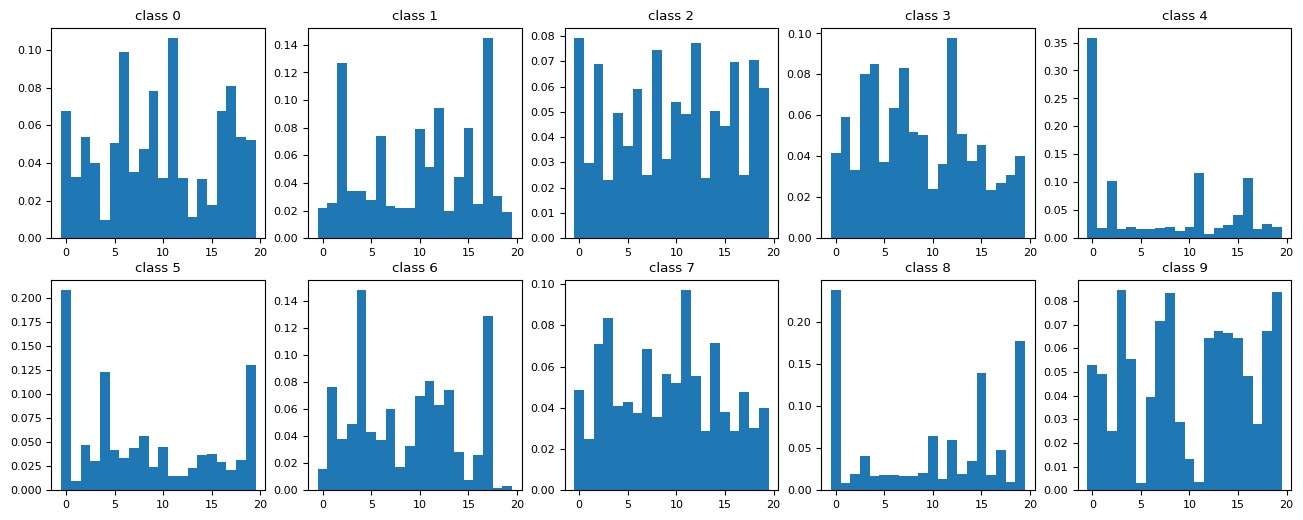

In [28]:
# 绘制texton上的直方图
cnt = 0
plt.figure(figsize=(16, 6))
for i in range(2):
    for j in range(5):
        plt.subplot(2, 5, cnt+1)
        plt.title(f"class {cnt}")
        plt.bar(x=range(n_clusters), height=histogram_database[cnt], width=1)
        cnt += 1

In [21]:
# 基于texton进行纹理分类
def classify_textons(feature, textons, histogram_database):
    C, H, W = feature.shape
    distance = float('inf')
    out_class = -1
    for _class in range(textons.shape[0]):
        ref_histogram = histogram_database[_class].astype('float32')
        histogram = get_histogram(feature, _class, textons).astype('float32')
        assert((sum(ref_histogram) - 1 ) < 1e-3 and (sum(histogram) - 1 ) < 1e-3), "Sum of histogram is out of range!"
        # 计算直方图的卡方距离
        dist = cv2.compareHist(ref_histogram, histogram, cv2.HISTCMP_CHISQR)
        if dist < distance:
            distance = dist
            out_class = _class
    return out_class


pre_class = np.zeros(test_feature.shape[0])       
for i in range(test_feature.shape[0]):
    pre_class[i] = classify_textons(test_feature[i], vector, histogram_database)
    
score = sum(np.repeat(range(10), 2) == pre_class) / len(pre_class)
print(f"测试集上正确率:{100*score:.4f}%")

测试集上正确率:90.0000%


### 基于texton的纹理重建

输入：一幅纹理图像

目标：对这幅图像构建的texton字典，利用texton重构该图像。

原理：图像的每个像素都对应一个texton，可以通过其对应的appearance vector求滤波器的最小二乘下的输入是什么样子的。

具体的做法在上面的论文中有详细描述：

1. 计算滤波器矩阵的伪逆。将每个滤波器都拉成一个行向量，C个滤波器构成一个新的F矩阵（$HW \times C$），求这个矩阵的伪逆$F^+$。
2. $F^+$与每个texton的appearance vector相乘，得到每个texton对应的重构patch。根据原图像的每个像素值对应的texton，找到对应的重构patch（记得把得到的向量reshape成滤波器大小的patch），将该patch的中心元素作为重构图像的该像素的像素值。

要求达到类似原文Figure 5所展示的效果，注意，选用的纹理图像不一样，效果会有区别。

In [22]:
# TODO 使用texton对纹理进行重构
def get_pseudo_inverse(F):
    H, W, C = F.shape
    t_F = np.zeros((H * W, C))
    cnt = 0
    for i in range(H):
        for j in range(W):
            t_F[cnt] = F[i, j, :]
            cnt += 1
    pinv_F = np.linalg.pinv(t_F)
    return pinv_F

def reconstruct_textons(feature_map, n_clusters):
    km = KMeans(n_clusters)
    t_feature_map = trans_feature_map(feature_map)
    km.fit(t_feature_map)
    texton = km.cluster_centers_
    pinv_F = get_pseudo_inverse(F)
    patch = np.matmul(texton, pinv_F).reshape(texton.shape[0],F.shape[0],F.shape[1])
    f = patch.shape[1]
    image = patch[km.labels_,f//2,f//2].reshape((feature_map.shape[1],feature_map.shape[2]))
    return image

dataset = np.zeros((num_class, 2, 1, 50, 50))
for i in range(num_class):
    dataset[i][0][0] = training_dataset[i*50][0][0]

(-0.5, 49.5, 49.5, -0.5)

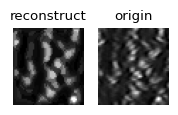

In [29]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(2, 1))
feature_map = get_feature_map(dataset, F, num_per_class=1, num_class=10, all_per_class=1)[2]
image = reconstruct_textons(feature_map, n_clusters=50)
plt.subplot(1, 2, 1)
plt.title("reconstruct")
plt.imshow(image, cmap='gray', aspect='auto')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("origin")
plt.imshow(dataset[2][0][0],cmap='gray',aspect='auto')
plt.axis('off')


## 可学习的特征

filter bank设计得很巧妙，是学者的脑力贡献，如何运用filter bank提取的丰富特征？我们前面用了均值和方差统计特征（average pooling）和texton（聚类pooling）。如果能从数据中学习到更合适的滤波器，岂不是更好？

我们使用深度神经网络里的CNN（convolutional neural network）模型。2016年PR Letter上有篇文章[Using filter banks in Convolutional Neural Networks for texture classification](https://www.semanticscholar.org/paper/Using-filter-banks-in-Convolutional-Neural-Networks-Andrearczyk-Whelan/988b4683dfb0566cf862f37d9e452d94d0bed916)，设计了2层CNN，后接几个FC层，进行了纹理分类任务，这篇工作的网络模型非常简单，但是对数据集的收集和实验做的比较好，值得阅读和借鉴。

请设计一个两层的CNN网络，第一个卷积层设置为之前使用的LM filter bank：48个卷积核（滤波器），大小为$49 \times 49$（够大核的）。第二层卷积层的卷积核大小为$1 \times 1$，卷积核的个数设置为纹理类别的个数。网络的第三层为global average pooling层(GAP层)。最后接softmax输出类别概率。

第一层卷积层因为使用设计好的filter bank，所以需要加载现成的参数，相当于预训练的部分模型参数。

代码实现分两部分。第一部分先freeze第一个卷积层，只学习第二个卷积层。第二部分学习网络的全部参数，相当于对filter bank进行微调fine tuning。对比一下两个部分的分类效果，并把第二部分的微调后的第一个卷积层的滤波器保存并可视化出来，看看和学者们设计的滤波器相比有什么变化。

In [24]:
# 华为智能基座吗？
# import mindspore as torch

# 下面这个示例是关于如何修改网络参数以及固定网络参数不更新

import numpy as np
import torch
from torch import nn

class TextonNet(nn.Module):
    def __init__(self):
        super(TextonNet, self).__init__()
        self.conv_test = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding='same', bias=False)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=48, kernel_size=49, padding='valid', bias=False)
        self.conv2 = nn.Conv2d(in_channels=48, out_channels=13, kernel_size=1)
        self.pooling = nn.AdaptiveAvgPool2d(output_size=1)
    def forward(self, x):
        x = self.conv_test(x)
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.pooling(out)
        out = out.flatten(start_dim=1)
        return out

model = TextonNet()
print(f"Model structure: {model}\n\n")

x = torch.randn(2, 1, 256, 256)
y = model(x)
print(y.shape, '\n', y)

Model structure: TextonNet(
  (conv_test): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (conv1): Conv2d(1, 48, kernel_size=(49, 49), stride=(1, 1), padding=valid, bias=False)
  (conv2): Conv2d(48, 13, kernel_size=(1, 1), stride=(1, 1))
  (pooling): AdaptiveAvgPool2d(output_size=1)
)


torch.Size([2, 13]) 
 tensor([[ 0.0429,  0.0821,  0.0903, -0.0784, -0.0641, -0.0072,  0.1107, -0.0679,
         -0.0262,  0.1400,  0.0083, -0.1295, -0.0943],
        [ 0.0434,  0.0812,  0.0907, -0.0777, -0.0636, -0.0045,  0.1107, -0.0684,
         -0.0262,  0.1389,  0.0078, -0.1315, -0.0946]],
       grad_fn=<ViewBackward0>)


In [25]:
state_dict = model.state_dict()
print(f"Layer: conv_test | Size: {state_dict['conv_test.weight'].size()} | Values : {state_dict['conv_test.weight']} \n")

# 修改模型的某个参数，参考这个实现加载LM filter bank
with torch.no_grad():
    # 修改卷积层里的conv_test滤波器为Sobel算子
    model.conv_test.weight[0][0] = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

print(f"Layer: conv_test | Size: {state_dict['conv_test.weight'].size()} | Values : {state_dict['conv_test.weight']} \n")

Layer: conv_test | Size: torch.Size([1, 1, 3, 3]) | Values : tensor([[[[-0.2879,  0.0010, -0.2844],
          [-0.0680,  0.0103, -0.3306],
          [-0.1704, -0.2388, -0.3023]]]]) 

Layer: conv_test | Size: torch.Size([1, 1, 3, 3]) | Values : tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]]) 



### 冻结模型参数

In [26]:
# 获取模型的参数，有state_dict和parameters（named_parameters)两种方法，
# 除了返回类型不同外，更重要的是参数的requires_grad属性的区别。
# 尤其是需要把某些参数freeze，使其不在学习过程中更新


# 方法1：直接修改参数的"requires_grad"值
# model.fc1.weight.requires_grad = False

# 方法2：通过parameters()或named_parameter()函数返回的生成器(generator)来修改
for name, param in model.named_parameters():
    if name == 'conv1.weight':
        param.requires_grad = False

for name, param in model.named_parameters():
    print(f'{name}, {param.requires_grad}')
print('\n')

# 如何验证修改成功了呢？
# 这时需要使用parameters()或者named_parameters()函数提取参数，然后输出其requires_grad属性查看。
# 因为模型训练时，是把模型的parameters()传给优化器，而不是state_dict。

# 错误的方法：通过state_dict来修改
# 这种做法无法在反向传播时冻结参数
# state_dict提取的模型参数的requires_grad默认都是False
# 比如直接输出fc1.bias的requires_grad属性，结果为False
# print("state_dict['fc1.bias'].requires_grad is ")
# print(model.state_dict()['fc1.bias'].requires_grad)

# 下面的代码，使用state_dict将fc1.bias的requires_grad修改为False，
# 通过state_dict的方式再次验证，其值也是False，
# 但是通过named_parameters()方法查看其requires_grad属性，结果还是True
# model.state_dict()['fc1.bias'] = False
# print("state_dict['fc1.bias'].requires_grad is ")
# print(model.state_dict()['fc1.bias'].requires_grad)
# for name, param in model.named_parameters():
#     print(f'{name}, {param.requires_grad}')
# print('\n')
# PyTorch这样设计是因为考虑到使用state_dict提取模型参数时通常会做一些修改，
# 如果这些修改使用了某些影响梯度跟踪的运算，当requires_grad默认是True时会影响该参数的梯度计算。

# 网上有人提到用下面这种方法也是错误的。
# tmp_state_dict = model.state_dict()
# tmp_state_dict['fc1.bias'].requires_grad = False
# model.load_state_dict(tmp_state_dict)
# for name, param in model.named_parameters():
#     print(f'{name}, {param.requires_grad}')
# print('\n')

conv_test.weight, True
conv1.weight, False
conv2.weight, True
conv2.bias, True




思考题：如果微调后的滤波器分类效果更好的话，可否用在重构任务上？重构的效果会不会更好？如果重构效果更好的话，可否用深度网络实现重构任务？